# **Descriptive Analytics and Data Preprocessing on Sales & Discounts Dataset**



```
# Introduction
>> To perform descriptive analytics, visualize data distributions, and preprocess the dataset for further analysis.

```



# 1.Importing Packages


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 2. Load the Dataset

In [3]:
from google.colab import files
uploaded = files.upload()

Saving sales_data_with_discounts.csv to sales_data_with_discounts.csv


In [4]:
#Read the dataset
df = pd.read_csv('sales_data_with_discounts.csv')

# Display the first few rows of the dataset
df.head()


,Date,Day,SKU,City,Volume,BU,Brand,Model,Avg Price,Total Sales Value,Discount Rate (%),Discount Amount,Net Sales Value
0,01-04-2021,Thursday,M01,C,15,Mobiles,RealU,RU-10,12100,181500,11.654820,21153.498820,160346.501180
1,01-04-2021,Thursday,M02,C,10,Mobiles,RealU,RU-9 Plus,10100,101000,11.560498,11676.102961,89323.897039
2,01-04-2021,Thursday,M03,C,7,Mobiles,YouM,YM-99,16100,112700,9.456886,10657.910157,102042.089843
3,01-04-2021,Thursday,M04,C,6,Mobiles,YouM,YM-99 Plus,20100,120600,6.935385,8364.074702,112235.925298
4,01-04-2021,Thursday,M05,C,3,Mobiles,YouM,YM-98,8100,24300,17.995663,4372.946230,19927.053770


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 450 entries, 0 to 449
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Date               450 non-null    object 
 1   Day                450 non-null    object 
 2   SKU                450 non-null    object 
 3   City               450 non-null    object 
 4   Volume             450 non-null    int64  
 5   BU                 450 non-null    object 
 6   Brand              450 non-null    object 
 7   Model              450 non-null    object 
 8   Avg Price          450 non-null    int64  
 9   Total Sales Value  450 non-null    int64  
 10  Discount Rate (%)  450 non-null    float64
 11  Discount Amount    450 non-null    float64
 12  Net Sales Value    450 non-null    float64
dtypes: float64(3), int64(3), object(7)
memory usage: 45.8+ KB


# 2. Descriptive Analytics for Numerical Columns


```
# Objective: Compute mean, median, mode, and standard deviation.
```



In [6]:
#	Identify numerical columns and categorical columns in the dataset.
# Identify categorical columns where dtype == 'O'
cat_cols = df.columns[df.dtypes == 'O']
print("Categorical Columns: ", cat_cols)

# Identify numerical columns where dtype != 'O'
num_cols = df.columns[df.dtypes != 'O']
print("\nNumerical Columns: ", num_cols)



Categorical Columns:  Index(['Date', 'Day', 'SKU', 'City', 'BU', 'Brand', 'Model'], dtype='object')

Numerical Columns:  Index(['Volume', 'Avg Price', 'Total Sales Value', 'Discount Rate (%)',
       'Discount Amount', 'Net Sales Value'],
      dtype='object')


In [ ]:
#Calculate Descriptive Statistics for Numerical Columns: Mean, Median, Mode, and Standard Deviation for numerical columns
for col in num_cols:
    print(f"\nColumn: {col}")
    print(f"Mean: {df[col].mean()}")
    print(f"Median: {df[col].median()}")
    print(f"Mode: {df[col].mode()[0]}")
    print(f"Standard Deviation: {df[col].std()}")



Column: Volume
Mean: 5.066666666666666
Median: 4.0
Mode: 3
Standard Deviation: 4.231602391213923

Column: Avg Price
Mean: 10453.433333333332
Median: 1450.0
Mode: 400
Standard Deviation: 18079.90483993647

Column: Total Sales Value
Mean: 33812.83555555555
Median: 5700.0
Mode: 24300
Standard Deviation: 50535.07417255325

Column: Discount Rate (%)
Mean: 15.155241895330914
Median: 16.57776564929597
Mode: 5.007822189204133
Standard Deviation: 4.22060215332551

Column: Discount Amount
Mean: 3346.499424342415
Median: 988.9337332382784
Mode: 69.17794228822787
Standard Deviation: 4509.902963353998

Column: Net Sales Value
Mean: 30466.336131270138
Median: 4677.788059301853
Mode: 326.97480055470817
Standard Deviation: 46358.65662406695


# 3. Data Visualization



```
# a. Histograms for Numerical Columns
```



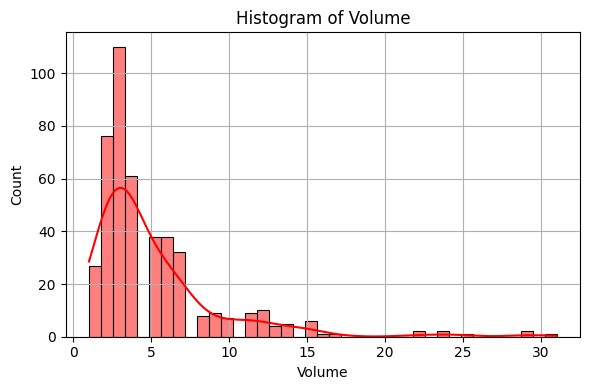

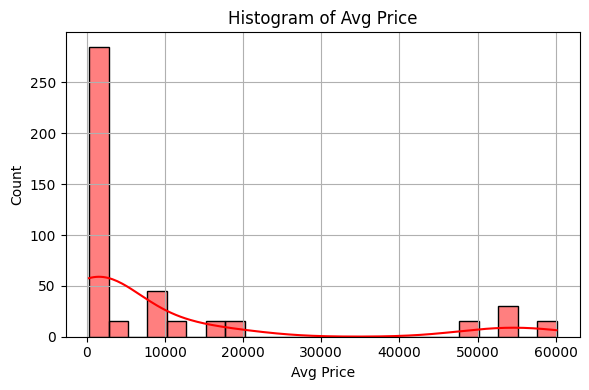

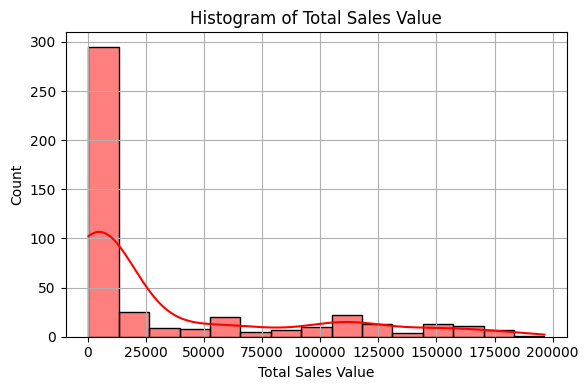

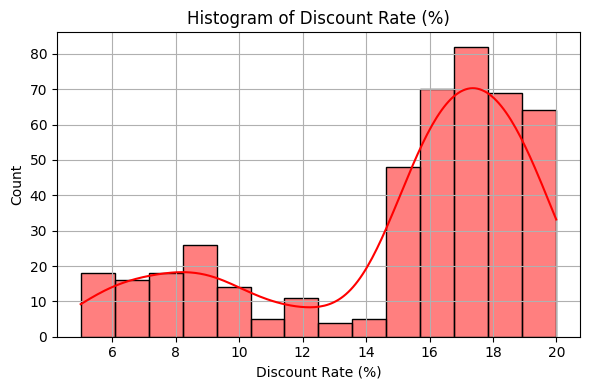

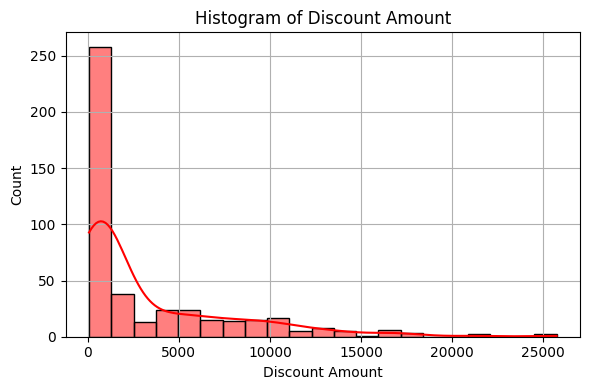

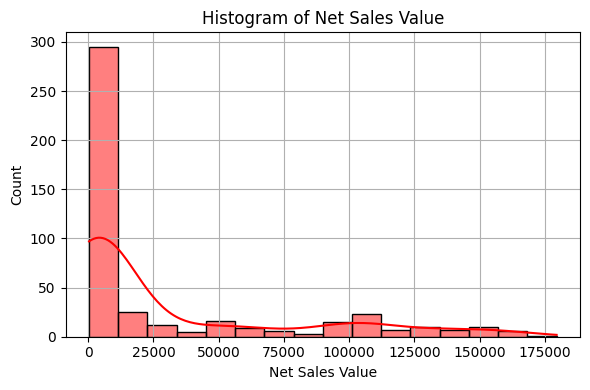

In [ ]:
for col in num_cols:
    plt.figure(figsize=(6,4))
    sns.histplot(df[col], kde=True,color='red')
    plt.title(f"Histogram of {col}")
    plt.tight_layout()
    plt.grid()




```
# b. Boxplots for Numerical Columns
```



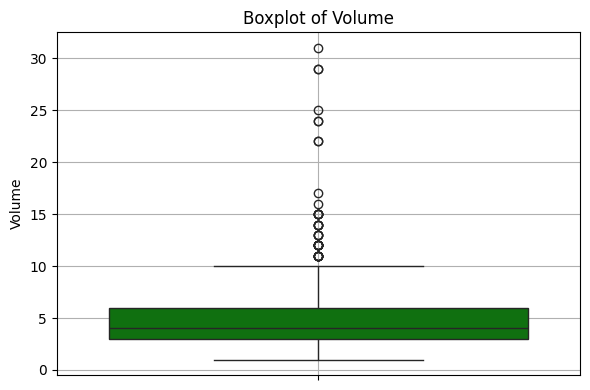

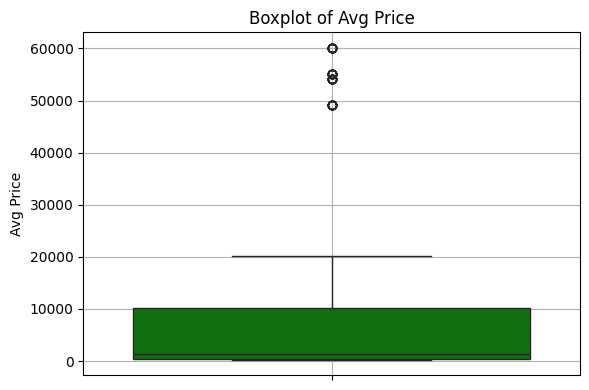

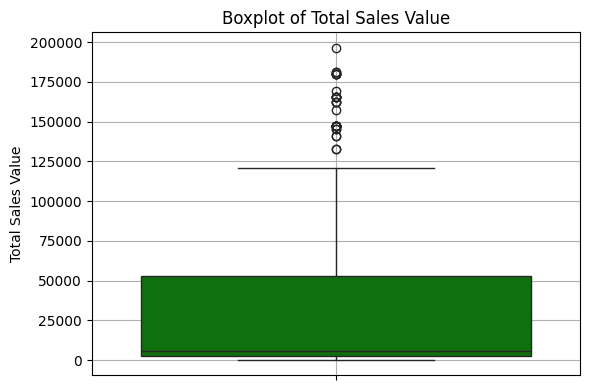

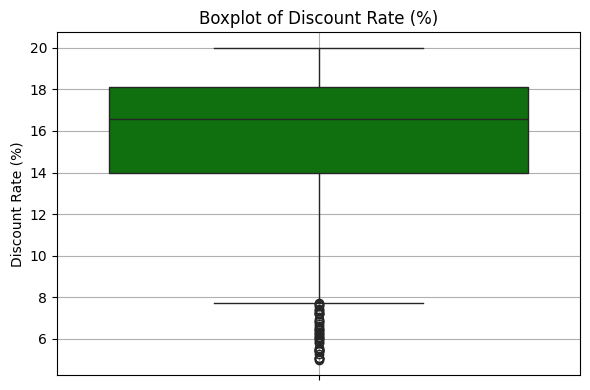

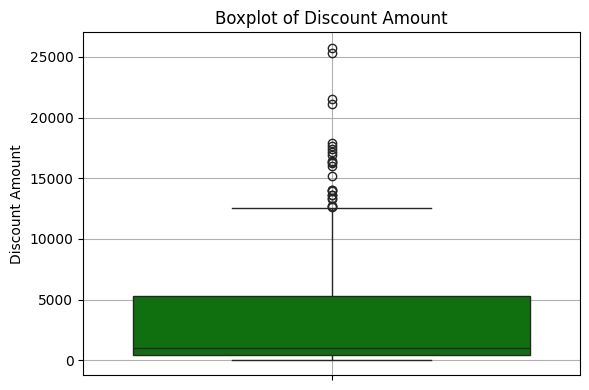

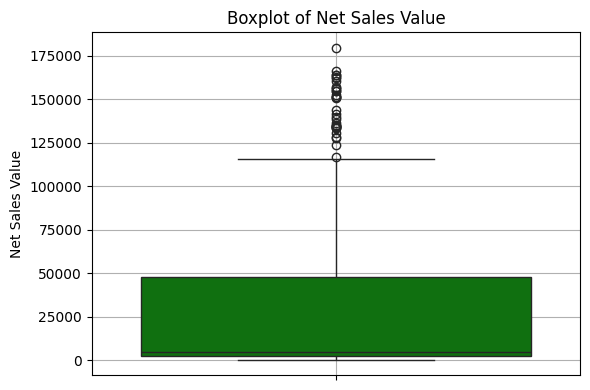

In [ ]:
# Plot boxplots for num_cols to identify outliers
for col in numerical_cols:
    plt.figure(figsize=(6, 4))
    sns.boxplot(y=df[col],color='green')
    plt.title(f"Boxplot of {col}")
    plt.tight_layout()
    plt.grid()




```
# Bar Chart Analysis for Categorical Columns
```





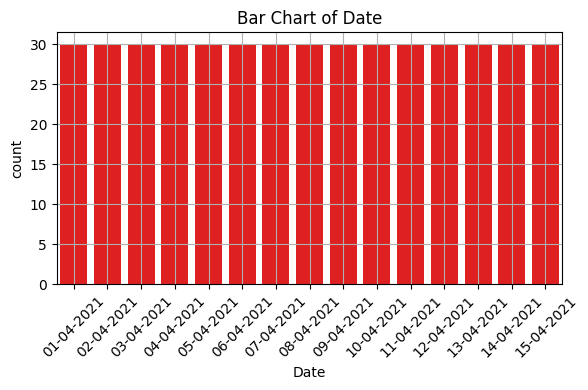

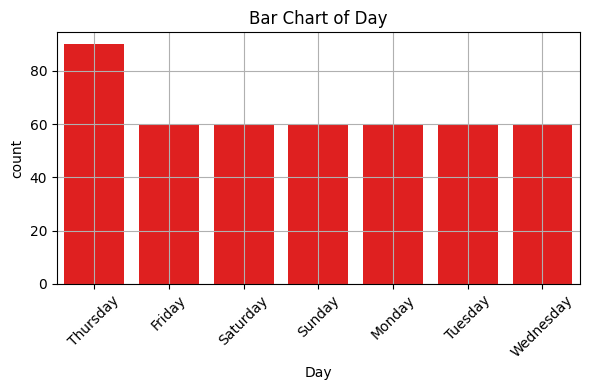

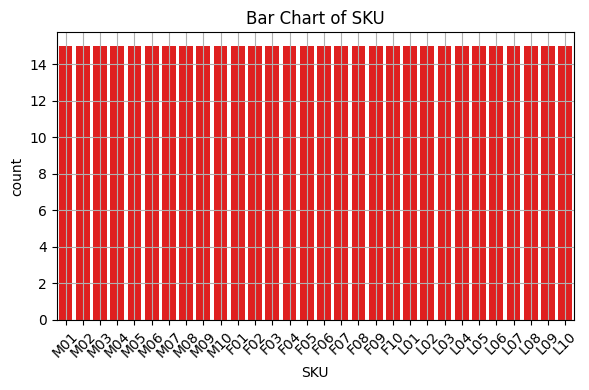

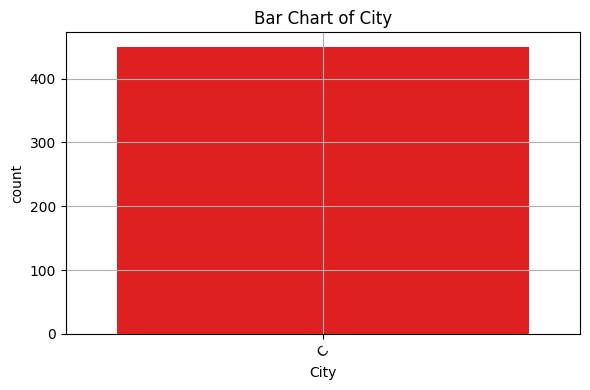

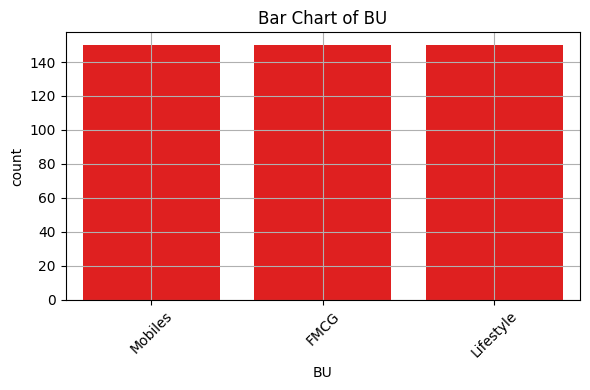

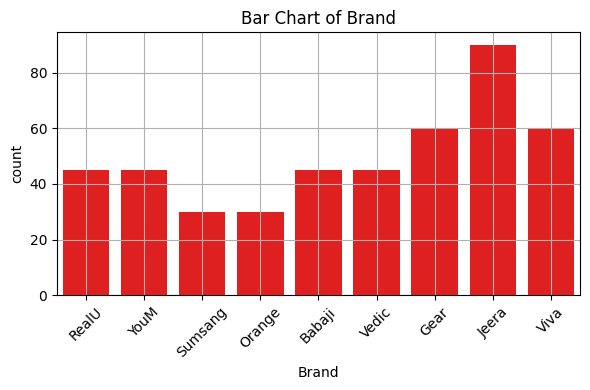

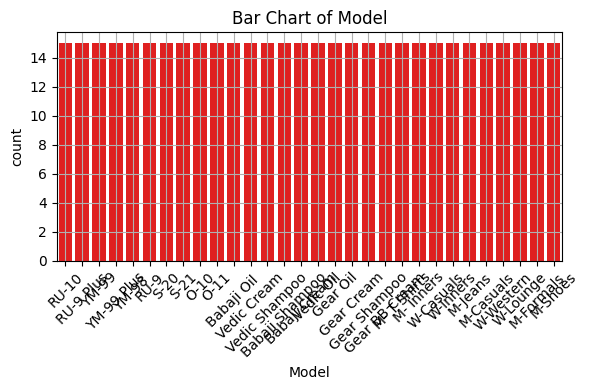

In [ ]:
# Plot bar charts for categorical columns
for col in cat_cols:
    plt.figure(figsize=(6, 4))
    sns.countplot(x=df[col],color='red')
    plt.title(f"Bar Chart of {col}")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.grid()


# 4. Standardization of Numerical Variables


	Explain the concept of standardization (z-score normalization).
```
Standardization (Z-Score Normalization)

Standardization, also known as Z-score normalization, is a technique used to
scale data so that it has a mean of 0 and a standard deviation of 1.
This ensures that the features in a dataset have comparable ranges and units,
making it easier for machine learning algorithms to process the data.

Formula for Z-Score Normalization:
       x−𝜇
Z=  _____________
        𝜎
Where:
x is the original data point
μ is the mean of the column (feature)
σ is the standard deviation of the column (feature)
z is the resulting Z-score (standardized value).
```



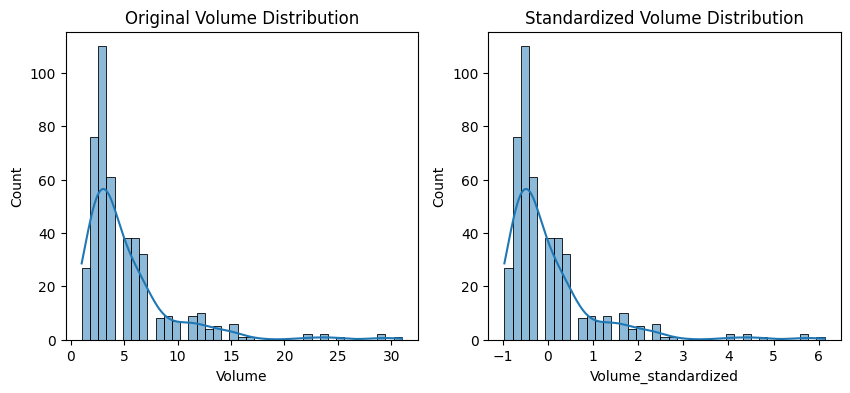

In [ ]:
# Standardize the numerical columns (Z-score Normalization)
for col in num_cols:
    df[col + '_standardized'] = (df[col] - df[col].mean()) / df[col].std()
#

# Compare before and after standardization for one column
col_to_compare = num_cols[0]  # Select the first numerical column for comparison
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
sns.histplot(df[col_to_compare], kde=True)
plt.title(f"Original {col_to_compare} Distribution")

plt.subplot(1, 2, 2)
sns.histplot(df[col_to_compare + '_standardized'], kde=True)
plt.title(f"Standardized {col_to_compare} Distribution")

plt.show()


                                                         # Another Advanced way

In [ ]:
num_cols

Index(['Volume', 'Avg Price', 'Total Sales Value', 'Discount Rate (%)',
       'Discount Amount', 'Net Sales Value'],
      dtype='object')

In [ ]:
# Import StandardScaler from scikit-learn
from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler = StandardScaler()

# Standardize the numerical columns
df_standardized = pd.DataFrame(scaler.fit_transform(df[num_cols]), columns=num_cols)


# Display the first few rows of the standardized columns
print(df[[col + '_standardized' for col in num_cols]].head())


   Volume_standardized  Avg Price_standardized  \
0             2.350029                0.091173   
1             1.167129               -0.019570   
2             0.457388                0.312659   
3             0.220808                0.534146   
4            -0.488932               -0.130313   

   Total Sales Value_standardized  Discount Rate (%)_standardized  \
0                        2.925721                       -0.830289   
1                        1.330995                       -0.852661   
2                        1.562775                       -1.351631   
3                        1.719276                       -1.949723   
4                       -0.188452                        0.673739   

   Discount Amount_standardized  Net Sales Value_standardized  
0                      3.952816                      2.804756  
1                      1.849014                      1.271026  
2                      1.622995                      1.545675  
3                      1.113

# 5. Conversion of Categorical Data into Dummy Variables

In [ ]:
cat_cols

Index(['Date', 'Day', 'SKU', 'City', 'BU', 'Brand', 'Model'], dtype='object')

In [ ]:
# Convert categorical columns to dummy variables (One-hot encoding)
df_encoded = pd.get_dummies(df, columns=cat_cols)

# Display the first few rows of the transformed dataset
print(df_encoded.head())


   Volume  Avg Price  Total Sales Value  Discount Rate (%)  Discount Amount  \
0      15      12100             181500          11.654820     21153.498820   
1      10      10100             101000          11.560498     11676.102961   
2       7      16100             112700           9.456886     10657.910157   
3       6      20100             120600           6.935385      8364.074702   
4       3       8100              24300          17.995663      4372.946230   

   Net Sales Value  Date_01-04-2021  Date_02-04-2021  Date_03-04-2021  \
0    160346.501180             True            False            False   
1     89323.897039             True            False            False   
2    102042.089843             True            False            False   
3    112235.925298             True            False            False   
4     19927.053770             True            False            False   

   Date_04-04-2021  ...  Model_Vedic Cream  Model_Vedic Oil  \
0            False  ...

In [ ]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 450 entries, 0 to 449
Columns: 101 entries, Volume to Model_YM-99 Plus
dtypes: bool(95), float64(3), int64(3)
memory usage: 63.0 KB


## **CONCLUSION**



```
# By using the method dtype == 'O',
 successfully identified the categorical and numerical columns.Then:

>> Performed descriptive statistics.
>> Visualized distributions and detected outliers.
>> Standardized numerical columns.
>> Converted categorical columns to dummy variables for machine learning models.
```



                               # SUBMITTED BY: Vamsi Krishna Gopidesi

